In [2]:
# Importing all the necessary libraries.
import pandas as pd
import numpy as np

In [3]:
# Loading the train and test data.
train = pd.read_csv("/content/drive/MyDrive/fronteir challenge/training_data.csv")
test = pd.read_csv("/content/drive/MyDrive/fronteir challenge/test_data.csv")

<ipython-input-3-015103346b42>:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("/content/drive/MyDrive/fronteir challenge/training_data.csv")


# Exploratory data analysis

In [4]:
train.head(5)

,Customer,clli,year,month,day,date,rack,shelf,slot,port,...,total_stops,TSO_calls_count,SA_TSO,score,REPORT_DATE,service_repair,TMAX,TMIN,PRCP,SNOW
0,1563347175154,CRTNTXXCOL6,2023,7,30,2023-07-30,1,1,14,2,...,0,NaN,0,3,NaN,NaN,102.02,80.06,0.0,NaN
1,1563350698175,CRTNTXXCOL6,2023,7,30,2023-07-30,1,1,14,2,...,0,NaN,0,3,NaN,NaN,102.02,80.06,0.0,NaN
2,1563348095607,CRTNTXXCOL6,2023,7,30,2023-07-30,1,1,18,2,...,0,NaN,0,3,NaN,NaN,102.02,80.06,0.0,NaN
3,1563344463954,CRTNTXXCOL6,2023,7,30,2023-07-30,1,1,13,2,...,0,NaN,0,3,NaN,NaN,102.02,80.06,0.0,NaN
4,1563350500609,CRTNTXXCOL6,2023,7,30,2023-07-30,1,1,13,4,...,0,NaN,0,3,NaN,NaN,102.02,80.06,0.0,NaN


In [5]:
print(f"Training data shape {train.shape}")
print(f"Testing data shape {test.shape}")


Training data shape (63075, 60)
Testing data shape (61149, 58)


In [6]:
# printing all the columns.
train.columns

Index(['Customer', 'clli', 'year', 'month', 'day', 'date', 'rack', 'shelf',
       'slot', 'port', 'ont', 'objectName', 'berDownstream', 'berUpstream',
       'objectType', 'networkRxLevel', 'modelRxLevel', 'modemTxLevel',
       'distance', 'opticalTemperature', 'opticalVoltage', 'modemType',
       'status', 'ranged', 'laserBiasThreshold', 'laserBiasCurrent',
       'videoAniAgcModePlanned', 'videoAniAgcSetting',
       'videoAniOpInfoOpticalSignalLevel',
       'videoAniOpInfoOpticalSignalLevelDbm', 'videoAniOpInfoRfPowerLevel',
       'videoAniOperState', 'speedProfile', 'Stops_null', 'Stops_Admin-Reset',
       'Stops_Idle-Timeout', 'Stops_Lost-Carrier', 'Stops_Lost-Service',
       'Stops_NAS-Error', 'Stops_NAS-Request', 'Stops_Port-Error',
       'Stops_Service-Unavailable', 'Stops_Session-Timeout',
       'Stops_User-Error', 'Stops_User-Request', 'INTENT',
       'CALLCOMPLETIONREASON', 'alarms', 'Alarm_SECS', 'Session_SECS',
       'total_stops', 'TSO_calls_count', 'SA_TSO', '

In [7]:
test.columns

Index(['Customer', 'clli', 'year', 'month', 'day', 'date', 'rack', 'shelf',
       'slot', 'port', 'ont', 'objectName', 'berDownstream', 'berUpstream',
       'objectType', 'networkRxLevel', 'modelRxLevel', 'modemTxLevel',
       'distance', 'opticalTemperature', 'opticalVoltage', 'modemType',
       'status', 'ranged', 'laserBiasThreshold', 'laserBiasCurrent',
       'videoAniAgcModePlanned', 'videoAniAgcSetting',
       'videoAniOpInfoOpticalSignalLevel',
       'videoAniOpInfoOpticalSignalLevelDbm', 'videoAniOpInfoRfPowerLevel',
       'videoAniOperState', 'speedProfile', 'Stops_null', 'Stops_Admin-Reset',
       'Stops_Idle-Timeout', 'Stops_Lost-Carrier', 'Stops_Lost-Service',
       'Stops_NAS-Error', 'Stops_NAS-Request', 'Stops_Port-Error',
       'Stops_Service-Unavailable', 'Stops_Session-Timeout',
       'Stops_User-Error', 'Stops_User-Request', 'INTENT',
       'CALLCOMPLETIONREASON', 'alarms', 'Alarm_SECS', 'Session_SECS',
       'total_stops', 'TSO_calls_count', 'SA_TSO', '

## 'REPORT_DATE', 'service_repair' are the two columns that we need determine. If there is a service repair issued the current data will be the Reported date.

In [8]:
test.isna().sum()

Customer                                   0
clli                                       0
year                                       0
month                                      0
day                                        0
date                                       0
rack                                       0
shelf                                      0
slot                                       0
port                                       0
ont                                        0
objectName                                 0
berDownstream                          35498
berUpstream                              838
objectType                                 0
networkRxLevel                         11077
modelRxLevel                               0
modemTxLevel                              50
distance                                1229
opticalTemperature                         0
opticalVoltage                             0
modemType                                910
status    

In [9]:
# Checking for Null values
train.isna().sum()

Customer                                   0
clli                                       0
year                                       0
month                                      0
day                                        0
date                                       0
rack                                       0
shelf                                      0
slot                                       0
port                                       0
ont                                        0
objectName                                 0
berDownstream                          35763
berUpstream                                3
objectType                                 0
networkRxLevel                         10354
modelRxLevel                               0
modemTxLevel                             107
distance                                 366
opticalTemperature                         1
opticalVoltage                             0
modemType                                 87
status    

# Preprocessing the data

### **Customer** - specific customer experiencing the network outage. Allows us to track down the issue based address and repair the nearby devices problems.
- Not required in model training unless we are doing customer segmentation. This is useful when a service repair is found

In [10]:
train_data = train.drop('Customer', axis=1)

### **clli** - Cili (Common Language Location Identifier) is the access layer identifier for the OLT (Optical Line Terminal) which helps in locating the specific OLT device responsible for serving the customer.
- Not required in model training only required after a service repair is found.

In [11]:
train_data = train_data.drop('clli', axis=1)

### **year, month, day, date** - These represent the date and time of the measurement. They help in tracking when the network outage occurred and provide a timeline when the service required occur.
- The date time information doesn't provide much information regarding whether their should be a service on a particular day.
- It has significance if we consider the time series analysis factor when there is several customer calls in a single day from different customer the chances of having a service request is high.

In [12]:
train_data = train_data.drop(['year', 'month', 'day', 'date'], axis=1)

### **rack, shelf, slot, port, ont** - These terms provide an exact location attributes of the customer's connection within the OLT infrastructure.
- These are useful to pinpoint the exact location when a service repair is required, but it doesn't contribute to whether a service repair is required.

In [13]:
columns = ['rack', 'shelf', 'slot', 'port', 'ont']
train_data = train_data.drop(columns, axis=1)

### **objectName** - Customer's network identifier which can be used to associate the customer's network equipment and configuration.
- It's primarily useful for identifying and resolving network outages once they have occurred, rather than predicting or preventing them from happening in the first place.

In [14]:
train_data = train_data.drop('objectName', axis=1)

### **berDownstream, berUpstream** - Bit Error rate towards customer and towards network plays a major role in the signal quality.
- BER measure of the number of bits that are received incorrectly compared to the total number of bits transmitted.
- A high BER value indicates a higher rate of errors in the received data.
- It is one of the important feature for the faultforecast Model.
- **berDownstream** parameter, which measures the BER towards the customer is having direct impact on the customer's network experience. This is blank for many columns as many models doesn't support these values.

In [15]:
# Checking the NaN values in case of the berDownstream and berUpstream for the entire data.
train_data[['berDownstream', 'berUpstream']].isna().sum()

berDownstream    35763
berUpstream          3
dtype: int64

In [16]:
# filtering out the data with a service repair to the correlation with the berDownstream and berUpstream
filtered_data = train_data[train_data['service_repair'] == 1]
print(f'The data that required service repair = {filtered_data.shape[0]}')

The data that required service repair = 1384


In [17]:
# Checking the NaN values for berDownstream and berUpstream in case of data when service repair is required.
filtered_data[['berDownstream', 'berUpstream']].isna().sum()

berDownstream    768
berUpstream        0
dtype: int64

In [18]:
filtered_data['berUpstream'][filtered_data['berUpstream'] >= 100]

195         306.0
285      990870.0
378       14963.0
481       17709.0
559       16250.0
           ...   
62147     24072.0
62341       107.0
62484       617.0
62507       214.0
63058       283.0
Name: berUpstream, Length: 371, dtype: float64

In [19]:
filtered_data['berDownstream'].value_counts()

berDownstream
0.0     511
4.0      10
6.0       6
8.0       6
2.0       4
       ... 
30.0      1
48.0      1
66.0      1
38.0      1
81.0      1
Name: count, Length: 61, dtype: int64

In [20]:
# Checking the values of berUpstream when the berDownstream is 0.0
filtered = filtered_data[filtered_data['berDownstream']==0.0]
filtered[['berDownstream', 'berUpstream']].head(5)

,berDownstream,berUpstream
123,0.0,37.0
182,0.0,59.0
285,0.0,990870.0
378,0.0,14963.0
481,0.0,17709.0


- Majority of the values in the berDownstream are less than 10 and null values where the service repair is required while the upstream values for the same are very high. Thus in this case **berUpstream** contribute more towards the network outage.
- We can either remove **berDownstream** or replace **berDownstream** NaN values with -1.

In [21]:
train_data[['berDownstream', 'berUpstream']] = train_data[['berDownstream', 'berUpstream']].fillna(-1)


- snow = 0 when precipitation is equal to zero. snow is a kind of precipitation when the temperature is around o degree C.
- Report date trend when the service repair was there. Did the reports reduced in the flow. The time between the each report date.


### **objectType** field with the value "ONT" indicates that all the columns in the dataset are specific to the Optical Network Terminal (ONT).
- All the values of objectType is of the same value so there is no significance in adding to the model as a feature to be considered.

In [22]:
train_data['objectType'].value_counts()

objectType
ONT    63075
Name: count, dtype: int64

In [23]:
train_data = train_data.drop('objectType', axis=1)

### **REPORT_DATE, service_repair** - these are the fields that needs to be predicted. The Report date occur when the service_repair is initiated.
- We don't need **REPORT_DATE** in the data for the model training to predict service repair since report date is something that happens after the service is initiated.
- The **service_repair** Null values should be replaced with 0.

In [24]:
train_data = train_data.drop('REPORT_DATE', axis=1)
train_data['service_repair'] = train_data['service_repair'].fillna(0)

### **networkRxLevel, modelRxLevel, modemTxLevel** - These fields represent the received signal strength at different points in the network, such as the OLT and ONT. Significant variations in signal strength can indicate potential network issues affecting the customer's connection.
- We cannot replace the NaN values with anything instead be considered as a different catergory that is unknown to us.

In [25]:
train_data[['networkRxLevel', 'modelRxLevel', 'modemTxLevel']].head(5)

,networkRxLevel,modelRxLevel,modemTxLevel
0,NaN,-18.266,-30.000
1,NaN,-18.856,2.020
2,NaN,-19.908,2.554
3,NaN,-18.690,2.054
4,NaN,-19.504,2.030


In [26]:
train_data[['networkRxLevel', 'modelRxLevel', 'modemTxLevel']].isna().sum()

networkRxLevel    10354
modelRxLevel          0
modemTxLevel        107
dtype: int64

In [27]:
nan_data = train_data[train_data['networkRxLevel'].isna()]
nan_data['service_repair'].value_counts()

service_repair
0.0    10112
1.0      242
Name: count, dtype: int64

In [28]:
nan_data = train_data[train_data['modemTxLevel'].isna()]
nan_data['service_repair'].value_counts()

service_repair
0.0    105
1.0      2
Name: count, dtype: int64

- The networkRxLevel indicates the strength of the signal received by the OLT from the customer's Optical Network Terminal (ONT)
- It provides information about the quality and intensity of the signal being transmitted over the network.
- A higher networkRxLevel value generally indicates a stronger signal, which is desirable for maintaining a reliable and stable network connection.
- The results shows that from the rows with **networkRxLevel == "NaN"**, **10112** out of **10354** doesn't require service only **242** require service. Which means that these values cannot be replaced with zero similar for the case of **modemTxLevel**.

In [29]:
# Replacing the NaN values using the forward filling method and backward filling.
train_data[['networkRxLevel', 'modelRxLevel', 'modemTxLevel']] = train_data[['networkRxLevel', 'modelRxLevel', 'modemTxLevel']].fillna(method='ffill').fillna(method='bfill')



### **distance, opticalTemperature, opticalVoltage, modemType, status, ranged** are important features to be considered for the model and and have a few null values.
- These values can be replaced with forward and backwardfill and median values.

In [30]:
train_data[['opticalVoltage', 'modemType', 'status', 'ranged', 'distance']] = train_data[['opticalVoltage', 'modemType', 'status', 'ranged', 'distance']].fillna(method='ffill').fillna(method='bfill')
median_value = train_data['opticalTemperature'].median()
train_data['opticalTemperature'] = train_data['opticalTemperature'].fillna(median_value)

- The status and ranged are categorical values and needs to be converted to the encoded format to train the model.
- order is kept true since the same formatting will be given during testing phase as well.

In [31]:
train_data['status'] = pd.Categorical(train_data['status'], ordered=True).codes
train_data['ranged'] = pd.Categorical(train_data['ranged'], ordered=True).codes

### **TMAX, TMIN** are the weather-related data such as maximum temperature, minimum temperature.
- These values can impact the network outage in several ways if there is extreme temperature it can lead to Infrastructure vulnerability, power supply issues, environmental factors etc.
- We cannot replace the values with mean or meadian since the data is in fashion that provides continuity.


In [32]:
train_data[['TMAX', 'TMIN']] = train_data[['TMAX', 'TMIN']].fillna(method='ffill').fillna(method='bfill')

### **PRCP** - It is the amount of precipitation that can occur during that day.
- The precipitation values cannot be replaced by applying conditions using the TMIN and TMAX since precipitation can occur at almost all types of weather conditions.
- Since the data is closed within a month mostly we can take the mean and fill the NaN values.

In [33]:
mean_value = train_data['PRCP'].mean()
train_data['PRCP'] = train_data['PRCP'].fillna(mean_value)

### **SNOW** - It occurs when there is precipitation
- when the precipitation value is **0** the snow cannot be possible. This is the first condition for filling nan values in snow.
- When the **TMIN** is above **50F** snow cannot be possible.

In [34]:
# Appplying the first Condition
train_data.loc[train_data['PRCP'] == 0.0, 'SNOW'] = train_data.loc[train_data['PRCP'] == 0.0, 'SNOW'].fillna(0.0)
# Applying the Second Condition
train_data.loc[train_data['TMIN'] > 50, 'SNOW'] = train_data.loc[train_data['TMIN'] > 50, 'SNOW'].fillna(0.0)

In [35]:
train_data['SNOW'].value_counts()

SNOW
0.0    63075
Name: count, dtype: int64

- Since all the values expect the null values were already zero and the rest also became zero the entire columns can be removed from model features

In [36]:
train_data = train_data.drop('SNOW', axis=1)

### **speedProfile** - This is a representation of the internet speed which the customer connection expected to operate.
- The speedProfile can be converted into the download speed and the upload speed to be considered into the model training.

In [37]:
"""Function to convert the different data speed into same format"""
def convert_speed(speed):
  if speed.endswith("M"):
    speed = float(speed.replace('M', ''))
  elif speed.endswith("K"):
    speed = float(speed.replace("K", ''))
    speed /= 1000
  else:
    speed = float(speed.replace('G', ''))
    speed *= 1000
  return speed

# Applying the speed convertion and adding the new columns to the training data.
train_data['download_speed'] = train_data['speedProfile'].apply(lambda x: convert_speed(x.split('/')[0]))
train_data['upload_speed'] = train_data['speedProfile'].apply(lambda x: convert_speed(x.split('/')[1]))

# Removing the speedProfile.
train_data = train_data.drop('speedProfile', axis=1)


### **laserBiasThreshold, laserBiasCurrent** - These values provide the bias current level for the laser diode within the transceiver.
- The laserBiasThreshold determines the target value for the bias current
- By Analysing the input data we can also see when the **laserBiasThreshold** value is **ONT Internal Policy** the corresponding **laserBiasCurrent** is Null.
- When the **laserBiasThreshold** is adjusted there is a significance change in the **laserBiasCurrent**

In [38]:
# Replacing all the NaN values in the laserBiasThreshold as Tunned policy
train_data['laserBiasThreshold'] = train_data['laserBiasThreshold'].fillna("Tunned _policy")

In [39]:
# Replacing all the nan values in laserbias current with zero when the laserbiasthreshold is ONT Internal Policy
train_data.loc[train_data['laserBiasThreshold'] == "ONT Internal Policy", 'laserBiasCurrent'] = train_data.loc[train_data['laserBiasThreshold'] == "ONT Internal Policy", 'laserBiasCurrent'].fillna(0)

- The column **laserBiasThreshold** also needs to be label encoded.

In [40]:
train_data['laserBiasThreshold'] = pd.Categorical(train_data['laserBiasThreshold'], ordered=True).codes

### **videoAniAgcModePlanned** is directly related to the **videoAniAgcSetting, videoAniOpInfoOpticalSignalLevel, videoAniOpInfoOpticalSignalLevelDbm, videoAniOpInfoRfPowerLevel**
- When the value of **videoAniAgcModePlanned** is empty or "Instance Unavailable" the data in the next 4 columns are NUll through out the data.

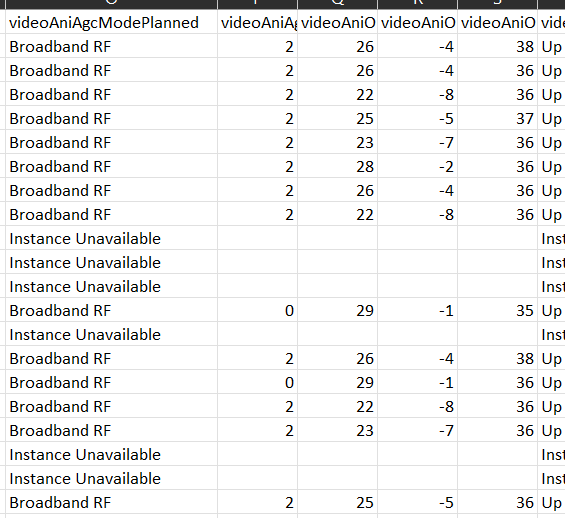

In [41]:
train_data['videoAniAgcModePlanned'].value_counts()

videoAniAgcModePlanned
Instance Unavailable    18774
Broadband RF             8172
Name: count, dtype: int64

In [42]:
# Replacing the null values in the videoAniAgcModePlanned with "Instance Unavailable"
train_data['videoAniAgcModePlanned'] = train_data['videoAniAgcModePlanned'].fillna("Instance Unavailable")

In [43]:
# Applying the conditions as per the pattern.
columns_to_fill = ['videoAniAgcSetting', 'videoAniOpInfoOpticalSignalLevel', 'videoAniOpInfoOpticalSignalLevelDbm', 'videoAniOpInfoRfPowerLevel']
condition = train_data['videoAniAgcModePlanned'] == "Instance Unavailable"
train_data.loc[condition, columns_to_fill] = train_data.loc[condition, columns_to_fill].fillna(0)

In [44]:
# Label Encoding the videoAniAgcModePlanned column.
train_data['videoAniAgcModePlanned'] = pd.Categorical(train_data['videoAniAgcModePlanned'], ordered=True).codes

### **videoAniOperState** is also dependent on the **videoAniAgcModePlanned**
- Replacing the null values with Instance Unavailable and label encoding the data.

In [45]:
# Replacing the null values in the videoAniOperState with "Instance Unavailable"
train_data['videoAniOperState'] = train_data['videoAniOperState'].fillna("Instance Unavailable")
train_data['videoAniOperState'] = pd.Categorical(train_data['videoAniOperState'], ordered=True).codes

### The Remaing columns have null values of the range of 61000 out of 63,000 of data and cannot be replaced in any means so they are dropped.

In [46]:
train_data.isna().sum()

berDownstream                              0
berUpstream                                0
networkRxLevel                             0
modelRxLevel                               0
modemTxLevel                               0
distance                                   0
opticalTemperature                         0
opticalVoltage                             0
modemType                                  0
status                                     0
ranged                                     0
laserBiasThreshold                         0
laserBiasCurrent                           0
videoAniAgcModePlanned                     0
videoAniAgcSetting                         0
videoAniOpInfoOpticalSignalLevel           0
videoAniOpInfoOpticalSignalLevelDbm        0
videoAniOpInfoRfPowerLevel                 0
videoAniOperState                          0
Stops_null                             63075
Stops_Admin-Reset                      62963
Stops_Idle-Timeout                     60425
Stops_Lost

In [47]:
# Dropping the coloums with null values.
train_data = train_data.dropna(axis=1)

In [48]:
train_data.isna().sum()

berDownstream                          0
berUpstream                            0
networkRxLevel                         0
modelRxLevel                           0
modemTxLevel                           0
distance                               0
opticalTemperature                     0
opticalVoltage                         0
modemType                              0
status                                 0
ranged                                 0
laserBiasThreshold                     0
laserBiasCurrent                       0
videoAniAgcModePlanned                 0
videoAniAgcSetting                     0
videoAniOpInfoOpticalSignalLevel       0
videoAniOpInfoOpticalSignalLevelDbm    0
videoAniOpInfoRfPowerLevel             0
videoAniOperState                      0
alarms                                 0
Alarm_SECS                             0
Session_SECS                           0
total_stops                            0
SA_TSO                                 0
score           

In [49]:
train_data.dtypes

berDownstream                          float64
berUpstream                            float64
networkRxLevel                         float64
modelRxLevel                           float64
modemTxLevel                           float64
distance                               float64
opticalTemperature                     float64
opticalVoltage                         float64
modemType                              float64
status                                    int8
ranged                                    int8
laserBiasThreshold                        int8
laserBiasCurrent                        object
videoAniAgcModePlanned                    int8
videoAniAgcSetting                     float64
videoAniOpInfoOpticalSignalLevel        object
videoAniOpInfoOpticalSignalLevelDbm     object
videoAniOpInfoRfPowerLevel              object
videoAniOperState                         int8
alarms                                   int64
Alarm_SECS                               int64
Session_SECS 

In [50]:
# Checking for Categorical values in the data.
categorical_columns = train_data.select_dtypes(include=['object', 'category']).columns

# Displaying the columns containing categorical values.
print(categorical_columns)

Index(['laserBiasCurrent', 'videoAniOpInfoOpticalSignalLevel',
       'videoAniOpInfoOpticalSignalLevelDbm', 'videoAniOpInfoRfPowerLevel'],
      dtype='object')


### Replacing the "Unknown" values with -1 so that the model can understand that these values are not known.

In [51]:
columns_to_replace = ['videoAniOpInfoOpticalSignalLevel', 'videoAniOpInfoOpticalSignalLevelDbm', 'videoAniOpInfoRfPowerLevel']
value_to_replace = "Unknown"
replacement_value = -1
train_data[columns_to_replace] = train_data[columns_to_replace].replace(value_to_replace, replacement_value)


In [52]:
# Converting to float data type from objects
columns_to_convert = ['laserBiasCurrent', 'videoAniOpInfoOpticalSignalLevel', 'videoAniOpInfoOpticalSignalLevelDbm', 'videoAniOpInfoRfPowerLevel']

# Replace 'Not Supported' with NaN
train_data[columns_to_convert] = train_data[columns_to_convert].replace('Not Supported', np.nan)

# Convert the columns to float
train_data[columns_to_convert] = train_data[columns_to_convert].astype(float)



# Model Building

In [53]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score


In [54]:
# Defining the inputs and targets
X = train_data.drop('service_repair', axis=1)
y = train_data['service_repair']

In [55]:
X.columns

Index(['berDownstream', 'berUpstream', 'networkRxLevel', 'modelRxLevel',
       'modemTxLevel', 'distance', 'opticalTemperature', 'opticalVoltage',
       'modemType', 'status', 'ranged', 'laserBiasThreshold',
       'laserBiasCurrent', 'videoAniAgcModePlanned', 'videoAniAgcSetting',
       'videoAniOpInfoOpticalSignalLevel',
       'videoAniOpInfoOpticalSignalLevelDbm', 'videoAniOpInfoRfPowerLevel',
       'videoAniOperState', 'alarms', 'Alarm_SECS', 'Session_SECS',
       'total_stops', 'SA_TSO', 'score', 'TMAX', 'TMIN', 'PRCP',
       'download_speed', 'upload_speed'],
      dtype='object')

In [56]:
# Splitting the data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [57]:
# Setting parameters for hyperparameter tunning.
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000]
}

In [58]:
# Defining the XG boosst object
xgb_model = xgb.XGBClassifier()
# Grid searchCV with 5 fold.
grid_search = GridSearchCV(estimator = xgb_model, param_grid = param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 500, 1000]})

In [59]:
# Finding the best parameters
best_params = grid_search.best_params_
print(best_params)

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}


In [60]:
# Training the model with the best parameters
xgb_model = xgb.XGBClassifier(**best_params)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [61]:
# Evaluating the model and finding the accuracy.
y_val_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_val_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.978359096313912


In [62]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_val_pred)
TP = cm[1, 1]  # True positive
FP = cm[0, 1]  # False positive
FN = cm[1, 0]  # False negative

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(f"Precision % {precision}")
print(f"Recall % {recall}")

Precision % 0.5666666666666667
Recall % 0.061371841155234655


# Finding the Feature Importance

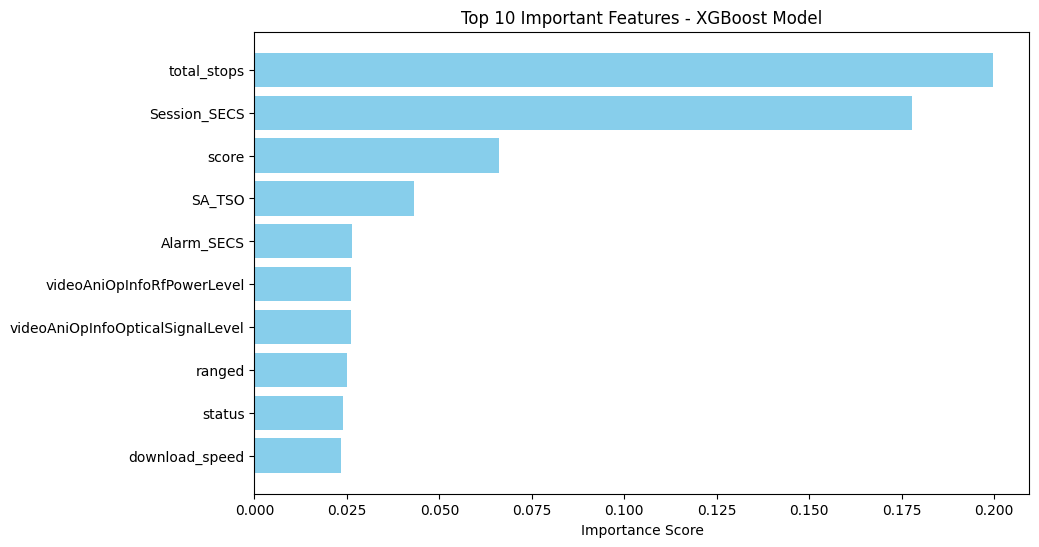

In [80]:
import matplotlib.pyplot as plt
# Get feature importances
feature_importance = xgb_model.feature_importances_
feature_names = X_train.columns.tolist()

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


# Plot top 10 features
top_features = feature_importance_df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Top 10 Important Features - XGBoost Model')
plt.gca().invert_yaxis()  # Invert y-axis to display most important feature at the top
plt.show()

In [75]:
import joblib

# Assuming your trained model is called 'model'
# Save the trained model
joblib.dump(xgb_model, 'trained_model.pkl')

# Load the saved model
loaded_model = joblib.load('trained_model.pkl')

## Loading the actual test data

In [64]:
test = pd.read_csv('/content/drive/MyDrive/fronteir challenge/test_data.csv')

In [65]:
def test_data_convertion(data):
  data = data.drop('Customer', axis=1)
  data = data.drop('clli', axis=1)
  data = data.drop(['year', 'month', 'day', 'date'], axis=1)
  columns = ['rack', 'shelf', 'slot', 'port', 'ont']
  data = data.drop(columns, axis=1)
  data = data.drop('objectName', axis=1)
  data[['berDownstream', 'berUpstream']] = data[['berDownstream', 'berUpstream']].fillna(-1)
  data = data.drop('objectType', axis=1)
  data[['networkRxLevel', 'modelRxLevel', 'modemTxLevel']] = data[['networkRxLevel', 'modelRxLevel', 'modemTxLevel']].fillna(method='ffill').fillna(method='bfill')
  data[['opticalVoltage', 'modemType', 'status', 'ranged', 'distance']] = data[['opticalVoltage', 'modemType', 'status', 'ranged', 'distance']].fillna(method='ffill').fillna(method='bfill')
  median_value = data['opticalTemperature'].median()
  data['opticalTemperature'] = data['opticalTemperature'].fillna(median_value)
  data[['TMAX', 'TMIN']] = data[['TMAX', 'TMIN']].fillna(method='ffill').fillna(method='bfill')
  mean_value = data['PRCP'].mean()
  data['PRCP'] = data['PRCP'].fillna(mean_value)
  # Appplying the first Condition
  data.loc[data['PRCP'] == 0.0, 'SNOW'] = data.loc[data['PRCP'] == 0.0, 'SNOW'].fillna(0.0)
  # Applying the Second Condition
  data.loc[data['TMIN'] > 50, 'SNOW'] = data.loc[data['TMIN'] > 50, 'SNOW'].fillna(0.0)
  data = data.drop('SNOW', axis=1)
  data['status'] = pd.Categorical(data['status'], ordered=True).codes
  data['ranged'] = pd.Categorical(data['ranged'], ordered=True).codes
  data['download_speed'] = data['speedProfile'].apply(lambda x: convert_speed(x.split('/')[0]))
  data['upload_speed'] = data['speedProfile'].apply(lambda x: convert_speed(x.split('/')[1]))
  # Remove the speedProfile column if needed
  data = data.drop('speedProfile', axis=1)
  data['laserBiasThreshold'] = data['laserBiasThreshold'].fillna("Tunned _policy")
  data.loc[data['laserBiasThreshold'] == "ONT Internal Policy", 'laserBiasCurrent'] = data.loc[data['laserBiasThreshold'] == "ONT Internal Policy", 'laserBiasCurrent'].fillna(0)
  data['laserBiasThreshold'] = pd.Categorical(data['laserBiasThreshold'], ordered=True).codes
  data['videoAniAgcModePlanned'] = data['videoAniAgcModePlanned'].fillna("Instance Unavailable")
  columns_to_fill = ['videoAniAgcSetting', 'videoAniOpInfoOpticalSignalLevel', 'videoAniOpInfoOpticalSignalLevelDbm', 'videoAniOpInfoRfPowerLevel']
  condition = data['videoAniAgcModePlanned'] == "Instance Unavailable"
  data.loc[condition, columns_to_fill] = data.loc[condition, columns_to_fill].fillna(0)
  data['videoAniAgcModePlanned'] = pd.Categorical(data['videoAniAgcModePlanned'], ordered=True).codes
  data['videoAniOperState'] = data['videoAniOperState'].fillna("Instance Unavailable")
  data['videoAniOperState'] = pd.Categorical(data['videoAniOperState'], ordered=True).codes

  columns_to_replace = ['videoAniOpInfoOpticalSignalLevel', 'videoAniOpInfoOpticalSignalLevelDbm', 'videoAniOpInfoRfPowerLevel']
  value_to_replace = "Unknown"
  replacement_value = -1
  data[columns_to_replace] = data[columns_to_replace].replace(value_to_replace, replacement_value)
  # Converting to float data type from objects
  data = data.dropna(axis=1)
  columns_to_convert = ['laserBiasCurrent', 'videoAniOpInfoOpticalSignalLevel', 'videoAniOpInfoOpticalSignalLevelDbm', 'videoAniOpInfoRfPowerLevel']

  # Replace 'Not Supported' with NaN
  data[columns_to_convert] = data[columns_to_convert].replace('Not Supported', np.nan)

  # Convert the columns to float
  data[columns_to_convert] = data[columns_to_convert].astype(float)

  return data

In [66]:
test_data = test_data_convertion(test)

In [67]:
test_data.columns

Index(['berDownstream', 'berUpstream', 'networkRxLevel', 'modelRxLevel',
       'modemTxLevel', 'distance', 'opticalTemperature', 'opticalVoltage',
       'modemType', 'status', 'ranged', 'laserBiasThreshold',
       'laserBiasCurrent', 'videoAniAgcModePlanned', 'videoAniAgcSetting',
       'videoAniOpInfoOpticalSignalLevel',
       'videoAniOpInfoOpticalSignalLevelDbm', 'videoAniOpInfoRfPowerLevel',
       'videoAniOperState', 'alarms', 'Alarm_SECS', 'Session_SECS',
       'total_stops', 'SA_TSO', 'score', 'TMAX', 'TMIN', 'PRCP',
       'download_speed', 'upload_speed'],
      dtype='object')

In [68]:
test_data.isna().sum()

berDownstream                          0
berUpstream                            0
networkRxLevel                         0
modelRxLevel                           0
modemTxLevel                           0
distance                               0
opticalTemperature                     0
opticalVoltage                         0
modemType                              0
status                                 0
ranged                                 0
laserBiasThreshold                     0
laserBiasCurrent                       0
videoAniAgcModePlanned                 0
videoAniAgcSetting                     0
videoAniOpInfoOpticalSignalLevel       0
videoAniOpInfoOpticalSignalLevelDbm    0
videoAniOpInfoRfPowerLevel             0
videoAniOperState                      0
alarms                                 0
Alarm_SECS                             0
Session_SECS                           0
total_stops                            0
SA_TSO                                 0
score           

## Predicting the results

In [69]:
y_pred = loaded_model.predict(test_data)

In [70]:
Output = pd.DataFrame({'Customer': test['Customer'], 'Service_Repair': y_pred})

In [71]:
Output['Service_Repair'].value_counts()

Service_Repair
0    60954
1      195
Name: count, dtype: int64

# Printing the results

In [72]:
Output

,Customer,Service_Repair
0,1563876974037,0
1,1563345053790,0
2,1564046340927,0
3,1563976424210,0
4,1563989812140,0
...,...,...
61144,724063906153,0
61145,1330701009764,0
61146,1330701009764,0
61147,1330003654282,0


In [73]:
Output.to_csv("results.csv")